# [Projet InPoDA - IN304](https://github.com/Egeyae/InPoDA-project-in304) - UVSQ UFR DES SCIENCES
#### *Done by KONSTANTINOV Julien and COSSEC Elouan*
---
**Goal:** Make a tweet analysis application *(extracting from french tweets: author, hastags, user mentioned, sentiment, topics)* and performing various data analysis actions

**Table of Contents**:

    - Part I: How we extract the tweets from the provided file
    - Part II: Different analysis operations performed on the tweets
    - Part III: Some references used for the project

### Installation
---
For installation process, please follow the guide in the `README.md` found in the project directory.
It is recommended to use a virtual environnement (with `Python 3.12.x` interpreter (or latest supported version by PyTorch))


In [1]:
### Setup
from InPoDA_Pipeline import *

# The InPoDA_Pipeline class is used as an interface to use the project
# A logger is set up automatically, to remove any logging/log to a file, please update the config.json file
pipeline = InPoDAPipeline()
pipeline.logger.info("Pipeline setup was a success")

GPU available: True
[2024-12-09 18:52:58,445] ::InPoDAPipeline:: (INFO) - Pipeline setup was a success


## I - Tweets data extraction
---
This part is a detailed explanation on how we extract tweets and parse them into a pandas.Dataframe()

##### ***1.** Load the tweets in memory*

In [2]:
tweets = pipeline.load_tweets()

[2024-12-09 18:52:58,448] ::InPoDAPipeline:: (INFO) - Loading tweets...


In [3]:
pretty_dict_display(tweets)

##### ***2.** Process the tweets in a pandas.DataFrame*

In [4]:
# Perform data extraction on the loaded tweets
dataframe = pipeline.process_tweets_to_dataframe()

[2024-12-09 18:52:58,465] ::InPoDAPipeline:: (INFO) - Processing tweets into a DataFrame...
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Tweet n°0 analysé
Tweet n°1 analysé
Tweet n°2 analysé
Tweet n°3 analysé
Tweet n°4 analysé
Tweet n°5 analysé
Tweet n°6 analysé
Tweet n°7 analysé
Tweet n°8 analysé
Tweet n°9 analysé
Tweet n°10 analysé
Tweet n°11 analysé
Tweet n°12 analysé
Tweet n°13 analysé
Tweet n°14 analysé
Tweet n°15 analysé
Tweet n°16 analysé
Tweet n°17 analysé
Tweet n°18 analysé
Tweet n°19 analysé


In [5]:
dataframe.head()

,Auteur,Hashtags,Mentions,Contenu,Topics
0,1339914264522461187,['#twitter225'],[],Goumin des éléphants joueurs la même fatigue m...,Histoire
1,1339914264522461187,"['#SupportriceMazo', '#domie', '#CIV']","['@ericbailly24', '@maxigr04del']",@ericbailly24 @maxigr04del mes tontons vous a...,Gestion des ressources humaines
2,1339914264522461187,['#CIV'],[],Ah oui le sommeil là sera compliqué. #CIV est...,Internet des objets
3,1339914264522461187,['#jifa'],[],"31 juillet , journée internationale de la femm...",Jeux vidéo
4,717025418,[],[],Le pedigree 😂😂😂😂 https://t.co/D3Rv7A2BOF,Ingénierie aérospatiale


##### *(**3.** Annex: Sentiment Analysis)*

For learning purposes, we tried to create our own Neural Network model, trained to find the sentiment of a tweet. We used a Genetic Algorithm approach to explore solutions as we were not at ease with backpropagation. The training dataset is Sentiment140, around 1.6 millions tweets annoted for sentiment analysis. We embedded the training tweets using a multilingual model as the project tweets were in French and Sentiment140's are in english.

In the following cells, we try to present the global pipeline of model usage and training. However, training the model can cost a lot in terms of resources, so the code is commented by default.

PS: As the results were too bad for any practical usage, InPoDA uses textblob for the moment until we find a valid solution. The predictions are very off the expected results, we get all fed data to be more or less in the same category. Which is strange because during training everything seems fine... An error lies between training and model usage: during training we have almost perfect results but when testing the best model we only get 50% accuracy.


###### **a.** Model loading

In [6]:
# Loads the best pre-computed model
pipeline.load_creature()

[2024-12-09 18:53:53,787] ::InPoDAPipeline:: (INFO) - Loading a pre-trained creature...


###### **b.** Model usage

In [7]:
# Example usage of the pre-computed model
test_tweet = "I'm so happy"

pipeline.process_input(test_tweet)

[2024-12-09 18:53:53,855] ::InPoDAPipeline:: (INFO) - Processing input data...


4.0


'positive'

###### (**c.** Model training)

In [8]:
# The dataset is very big and (1.6 million tweets) and it can be heavy on memory to store that much embeddings (768 * 2 bytes * 1.6 million ~= 2.3 GB)
# To prevent this, it treats the data chunk by chunk and save those chunks onto the disk in order to load these chunks only when needed during training.
# By default, chunks computation occurs every time but it can be expensive so we left the option to disable it
run_chunks = True

if run_chunks: 
    pipeline.compute_chunks()


[2024-12-09 18:53:54,173] ::InPoDAPipeline:: (INFO) - Computing chunks...
[2024-12-09 18:54:20,182] ::InPoDAPipeline:: (INFO) - Chunks done.


In [9]:
# Loads as a pandas.DataFrame the training data (all computed chunks)
# Configuration can be updated in the `config.json` file

pipeline.load_training_data()

[2024-12-09 18:54:20,185] ::InPoDAPipeline:: (INFO) - Loading training data...
[2024-12-09 18:55:06,293] ::InPoDAPipeline:: (INFO) - Loaded training data with 39999 tweets.


In [10]:
# The data is split in 2: first half is negative (sentiment 0)
pipeline.data.head()

,sentiment,text,embeddings
0,0.0,is upset that he can't update his Facebook by ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0.0,I dived many times for the ball. Managed to sa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0.0,my whole body feels itchy and like its on fire,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.0,"no, it's not behaving at all. i'm mad. why am ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0.0,not the whole crew,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
# Second half is positive (sentiment 4)
pipeline.data.tail()

,sentiment,text,embeddings
39994,4.0,Just woke up. Having no school is the best fee...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39995,4.0,TheWDB.com - Very cool to hear old Walt interv...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39996,4.0,Are you ready for your MoJo Makeover? Ask me f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39997,4.0,Happy 38th Birthday to my boo of alll time!!! ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39998,4.0,happy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
# Here we train a model based on the loaded data
# Since it is very expensive, it doesn't run by default
# Moreover, it is preferable to run directly the script `run_training.py` found in the ./sentiment_analysis/ folder
# ! Be aware that you need to update the save file in `config.json` if you don't want to override pre-trained model !
run = False

if run:
    pipeline.train_genetic_algorithm()

## II - Tweets data analysis
---
This part is a presentation of different analysis we can do using the data we loaded

#### **0. Data Presentation**
---
Presentation of all unique Authors, Mentions, Hashtags

In [13]:
# All authors
pipeline.get_all_authors()

[2024-12-09 18:55:06,356] ::InPoDAPipeline:: (INFO) - Getting all authors...


,Authors
0,60117154
1,2357913366
2,992904738516717570
3,717025418
4,372993152
5,1471684208
6,16267684
7,105241852
8,736523371
9,3169236915


In [14]:
# All mentions
pipeline.get_all_mentions()

[2024-12-09 18:55:06,362] ::InPoDAPipeline:: (INFO) - Getting all mentions...


,Mentions
0,@leonna_julie
1,@miliemelo82
2,@ericbailly24
3,@AzmiAnees3
4,@anniemacmanus
5,@isabelle170516
6,@LynLyna12
7,@lrestistant73
8,@Pauluskupa
9,@LeMeneec


In [15]:
# All hashtags
pipeline.get_all_hashtags()

[2024-12-09 18:55:06,369] ::InPoDAPipeline:: (INFO) - Getting all hashtags...


,Hashtags
0,#SupportriceMazo
1,#appollon
2,#twitter225
3,#domie
4,#versailles
5,#CIV
6,#nocturne
7,#jifa


#### 1. **Top K analysis**
---
We extract:

    - Top K hastags   (Most used hashtags)
    - Top K authors   (Users who posted the most tweets)
    - Top K mentioned (Users who were the most mentioned)
    - Top K topics    (Topics that comme back the most)


In [16]:
# Please set the desired K value here
K = 5 

[2024-12-09 18:55:06,383] ::InPoDAPipeline:: (INFO) - Extracting top K hashtags...


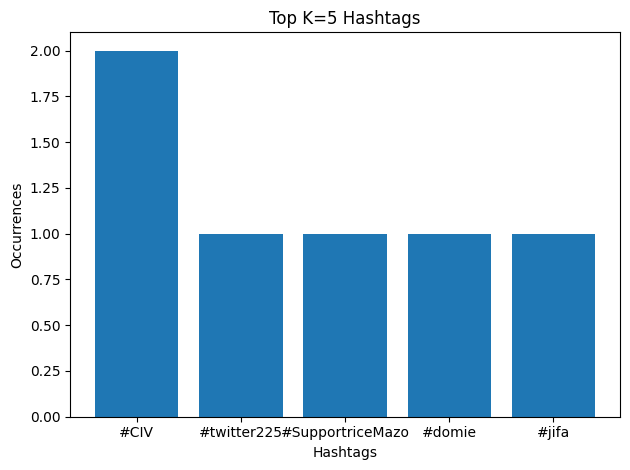

In [17]:
# TOP K HASHTAGS
pipeline.top_k_hashtags(k = K)

[2024-12-09 18:55:06,450] ::InPoDAPipeline:: (INFO) - Extracting top K authors...


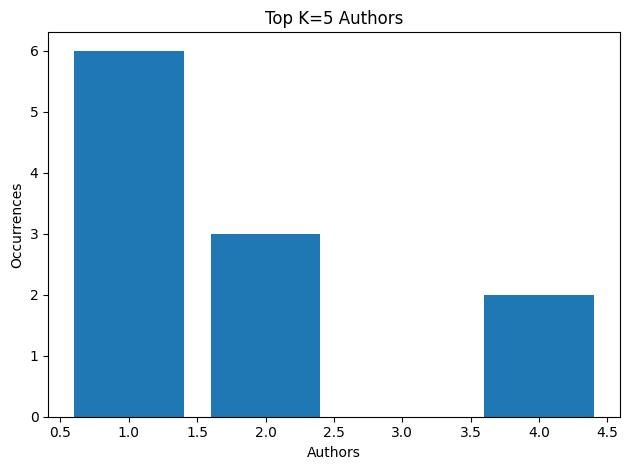

In [18]:
# TOP K AUTHORS
pipeline.top_k_authors(k = K)

[2024-12-09 18:55:06,506] ::InPoDAPipeline:: (INFO) - Extracting top K users mentioned...


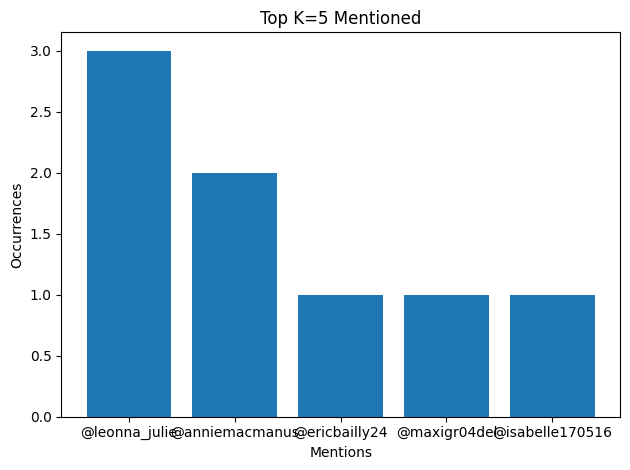

In [19]:
# TOP K MENTIONED
pipeline.top_k_mentioned(k = K)

In [20]:
# TOP K TOPICS
pipeline.top_k_topics(k = K)

[2024-12-09 18:55:06,558] ::InPoDAPipeline:: (INFO) - Extracting top K topics...


ValueError: not enough values to unpack (expected 2, got 0)

#### **2. Number of tweets per X**
---
We extract:

    - Number of tweets per user
    - Number of tweets per hashtags
    - Number of tweets per topics


In [ ]:
# Number of tweets per user

In [ ]:
# Number of tweets per hashtags

In [ ]:
# Number of tweets per topics

#### **3. User analysis**
---
We extract all tweets from a provided user

In [ ]:
# Set user
user = ""

In [ ]:
# All tweets from user

#### 4. Usage analysis
---

We extract:

    - All tweets mentionning a specific user
    - All users using a specific hashtag
    - All users mentionned by a specific user

In [ ]:
# All tweets mentionning a specific user
user = ""

In [ ]:
# All users using a hashtag
hashtag = ""

In [ ]:
# All users mentionned by a specific user
user = ""

## III - References
---
Dataset:
`Sentiment140 dataset with 1.6 million tweets. (2017, September 13). https://www.kaggle.com/datasets/kazanova/sentiment140`

Genetic Algorithm:
`9. Evolutionary computing. (n.d.). https://natureofcode.com/genetic-algorithms/`